In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [26]:
# Define the state structure for BMI calculation

class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [24]:
def calculate_bmi(state: BMIState) -> BMIState:
    """Calculate BMI given weight in kg and height in meters."""
    bmi = state['weight_kg'] / (state['height_m'] ** 2)
    state['bmi'] = round(bmi,2)
    return state

def categorize_bmi(state: BMIState) -> BMIState:
    """Categorize BMI into standard categories."""
    bmi = state["bmi"]

    if bmi < 18.5:
        state['category'] = "Underweight"

    elif bmi < 25:
        state['category'] = "Normal Weight"
    
    elif bmi < 30: 
        state["category"] = "Overweight"
    elif bmi < 35:
        state["category"] = "Obesity (class I)"

    elif bmi < 40:
        state["category"] = "Obesity (class II)"
    else:
        state["category"] = "Extreme Obesity (class III)"
    return state
 

In [30]:
# Define the Graph

graph = StateGraph(BMIState)

# add nodes to the graph

graph.add_node("calculate_bmi",calculate_bmi)
graph.add_node("categorize_bmi",categorize_bmi)

# add edges to the graph
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi","categorize_bmi")
graph.add_edge("categorize_bmi", END)

# compile the graph 
workflow = graph.compile()


In [31]:
# execute the graph with initial state
initial_state: BMIState = {"weight_kg": 58, "height_m": 1.69, "bmi": 0.0, "category": ""}
final_state  = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 58, 'height_m': 1.69, 'bmi': 20.31, 'category': 'Normal Weight'}


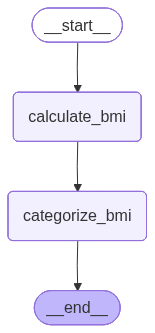

In [29]:
# print the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())